In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [12]:
data = pd.read_csv("Road-Accident.csv", na_values = -1, parse_dates=['time'], infer_datetime_format=True)

/Users/wendysunw/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
st = pd.Timestamp(year=1900, month=1, day=1)
def convert_date(x):
    return (pd.to_datetime(x,dayfirst=True) - st).days + 2

for i, row in data.iterrows():
    if len(row['date']) == 10:
        c = convert_date(row['date'])
        data.set_value(i,'date', c)


/Users/wendysunw/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [15]:
data['date'] = data['date'].astype(np.int64)

Replaced individual longitudes and latitudes based on mean value of each police force's location, to plot frequencies by sector.

In [16]:
police_n = sorted(data.police_force.unique().tolist())

long = data.groupby(['police_force'])['longitude'].mean().values
lat = data.groupby(['police_force'])['latitude'].mean().values

data1 = data.copy(deep=True)

for i, row in data1.iterrows():
    if row['police_force'] != np.nan:
        ii = police_n.index(row['police_force'])
        data1.set_value(i,'longitude',long[ii])
        data1.set_value(i,'latitude',lat[ii])
    else:
        data1.set_value(i,'longitude',np.nan)
        data1.set_value(i,'latitude',np.nan)



/Users/wendysunw/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/wendysunw/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


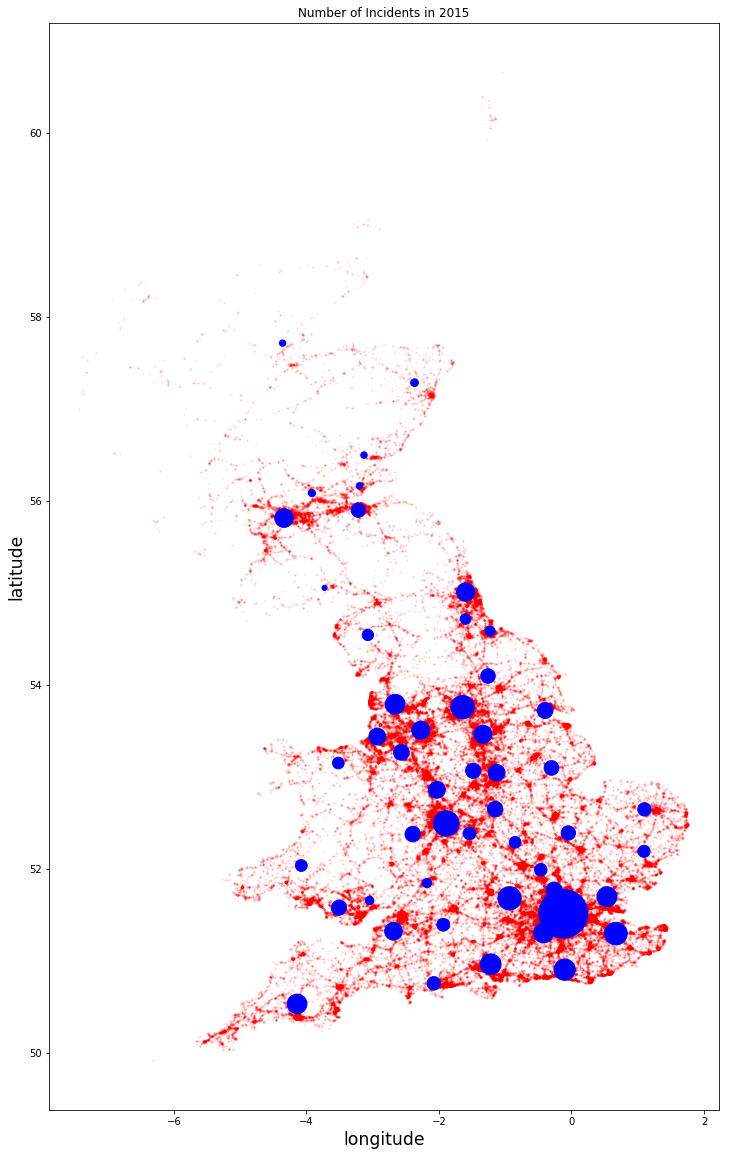

In [73]:
counts = pd.crosstab(data1.longitude, data1.latitude).stack().reset_index(name='freq')
counts = data1.groupby(["longitude", "latitude"]).size().reset_index(name='freq')
plt.figure(1, figsize=(12.0, 20.0))
plt.scatter(data.longitude,data.latitude,s=2,c='r',marker='o',alpha=0.05)
plt.scatter(counts['longitude'],counts['latitude'],s=counts['freq']/20,c='b',marker='o',alpha=1)
plt.title('Number of Incidents in 2015')
plt.xlabel('longitude',fontsize='xx-large')
plt.ylabel('latitude',fontsize='xx-large')
plt.show()

We then categorised the data by month, and plotted these results on 12 graphs, to show change over time.

In [18]:
m1 = convert_date('01/01/2015')
m2 = convert_date('01/02/2015')
m3 = convert_date('01/03/2015')
m4 = convert_date('01/04/2015')
m5 = convert_date('01/05/2015')
m6 = convert_date('01/06/2015')
m7 = convert_date('01/07/2015')
m8 = convert_date('01/08/2015')
m9 = convert_date('01/09/2015')
m10 = convert_date('01/10/2015')
m11 = convert_date('01/11/2015')
m12 = convert_date('01/12/2015')
m13= convert_date('01/01/2016')
m = [m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13]

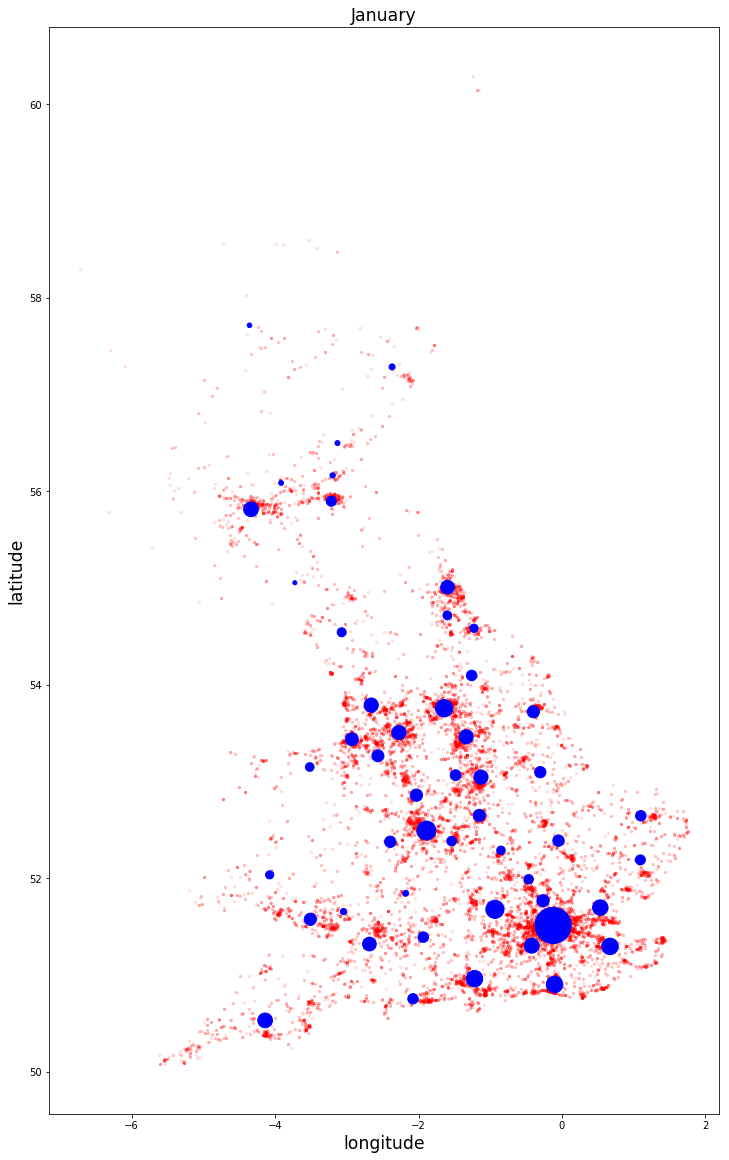

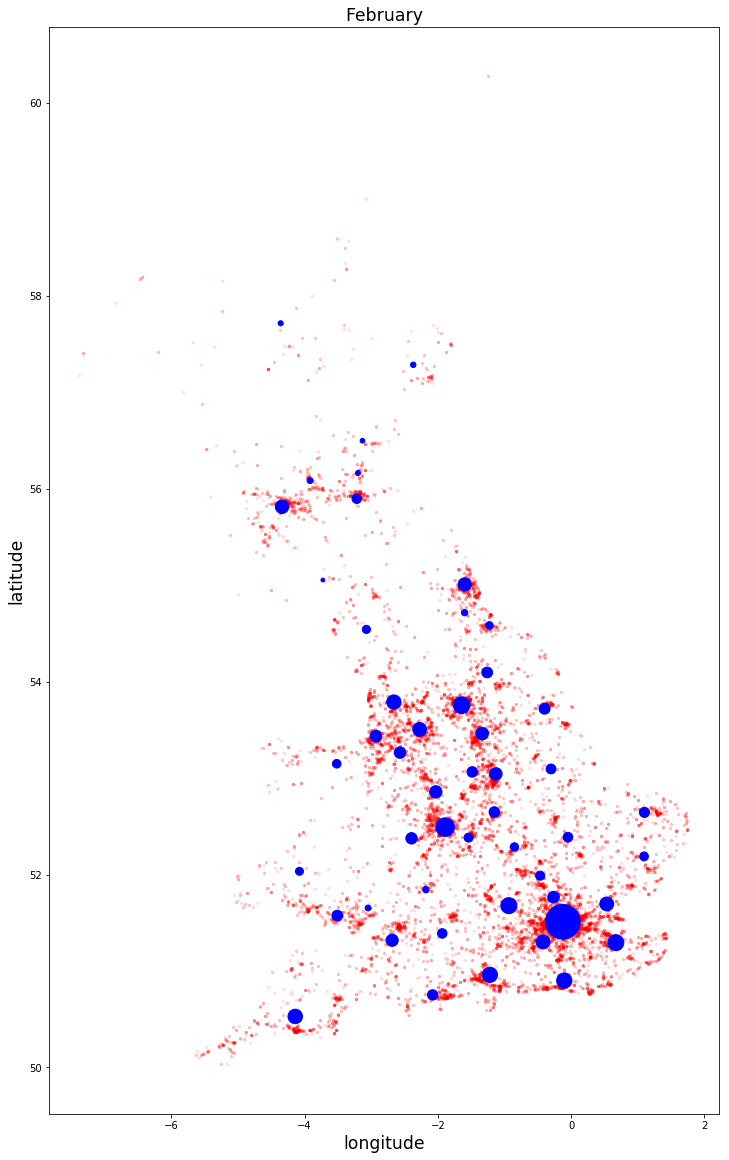

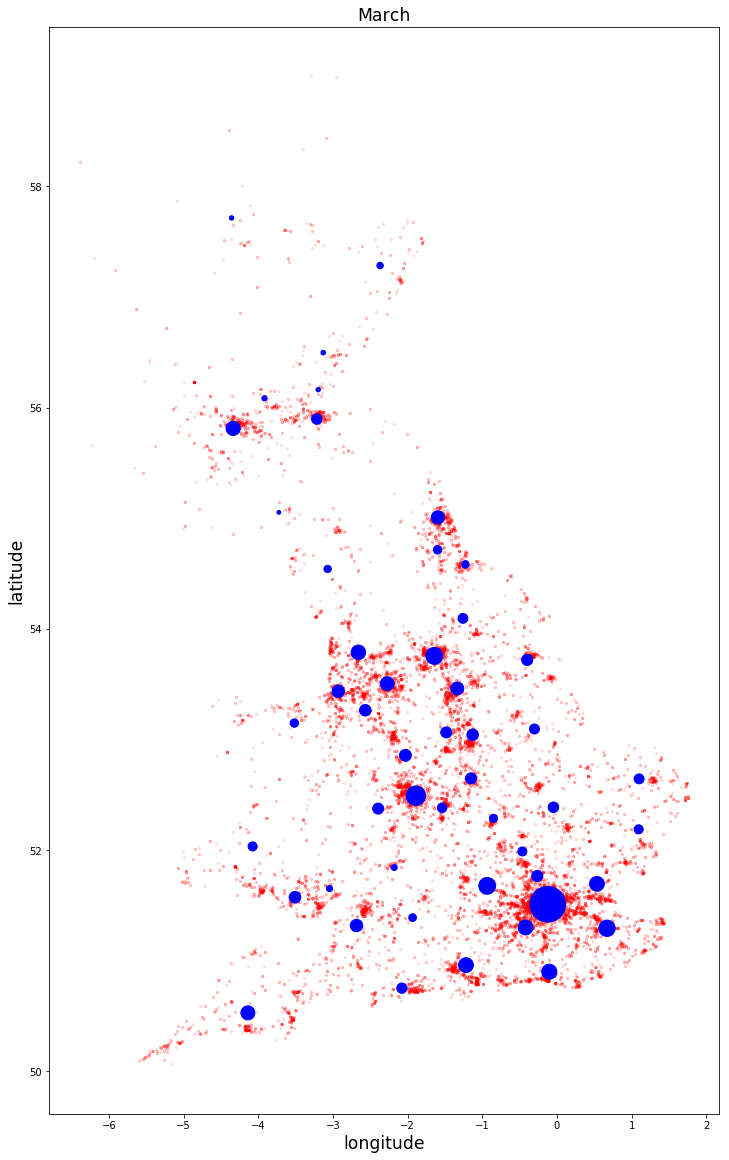

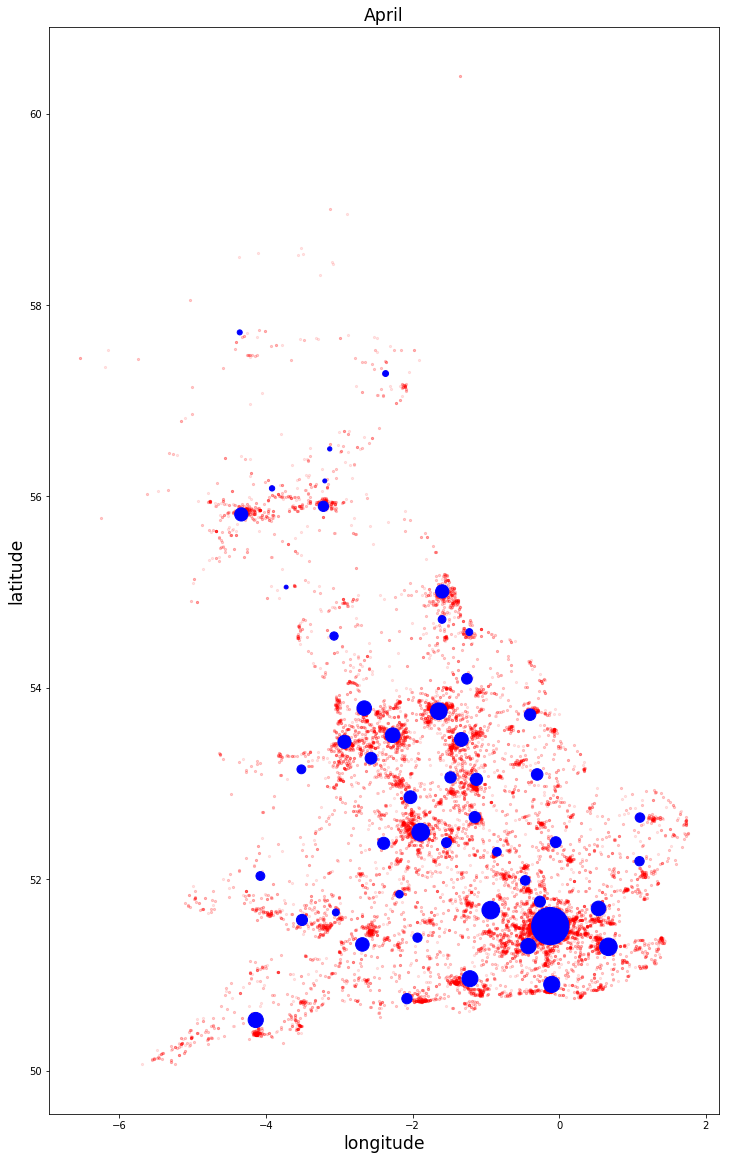

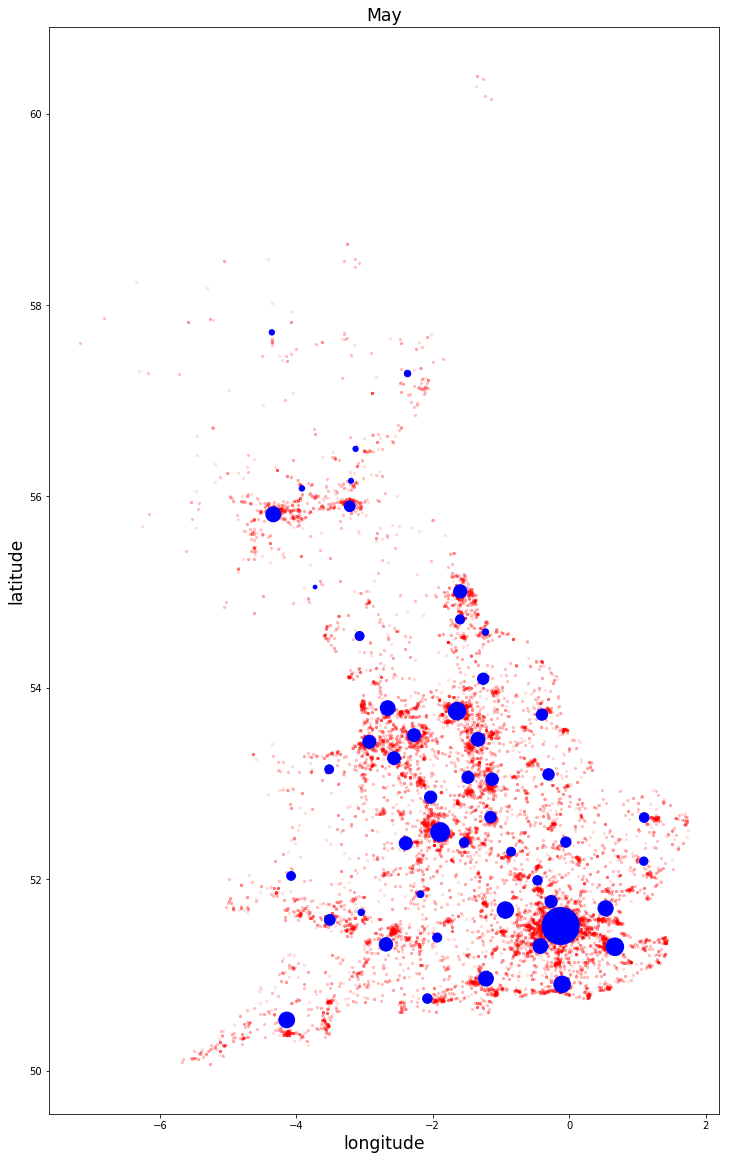

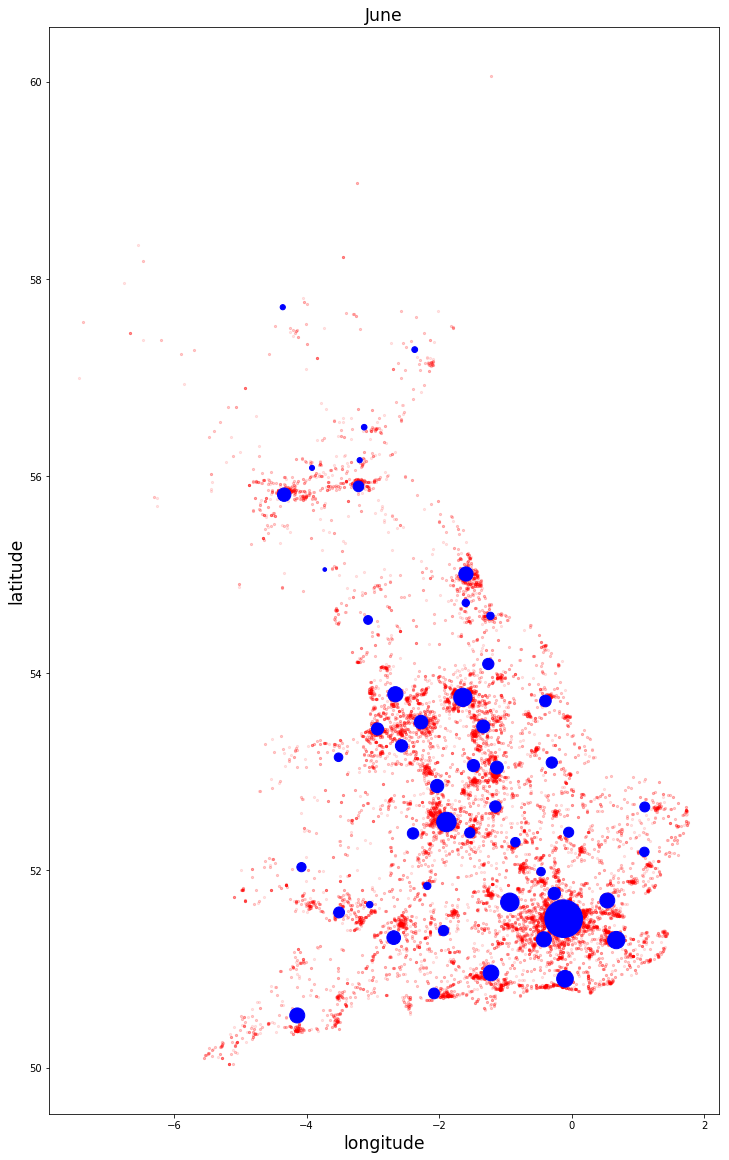

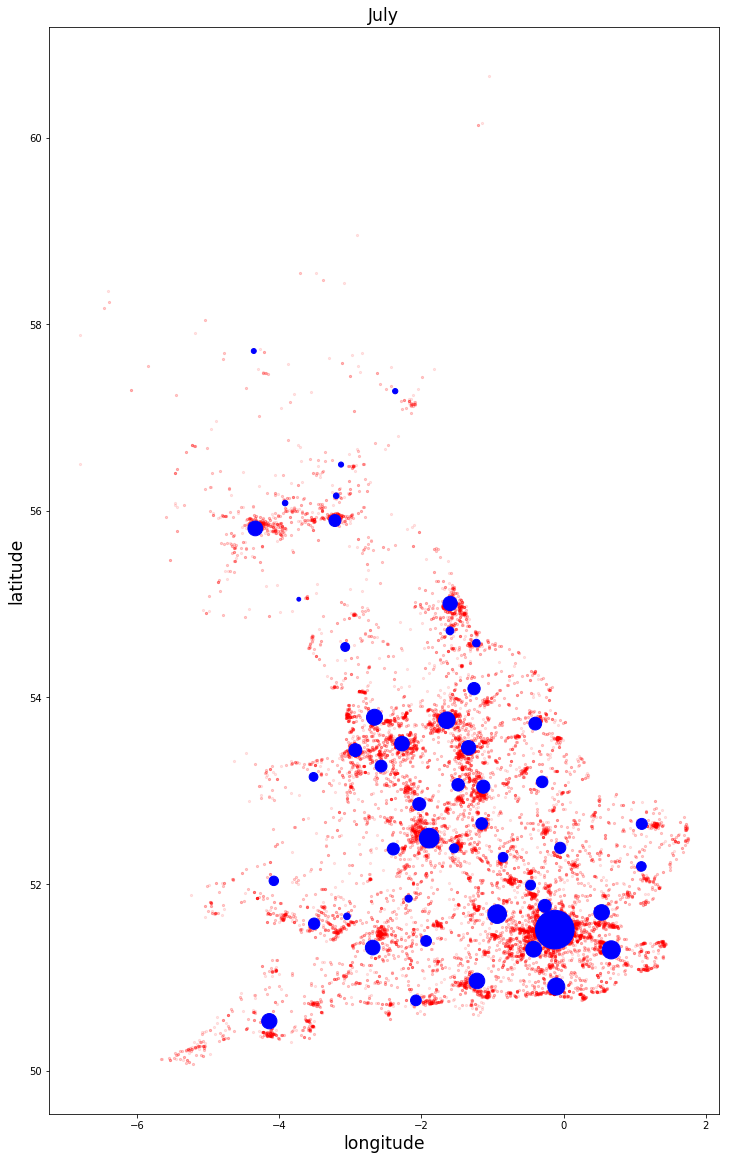

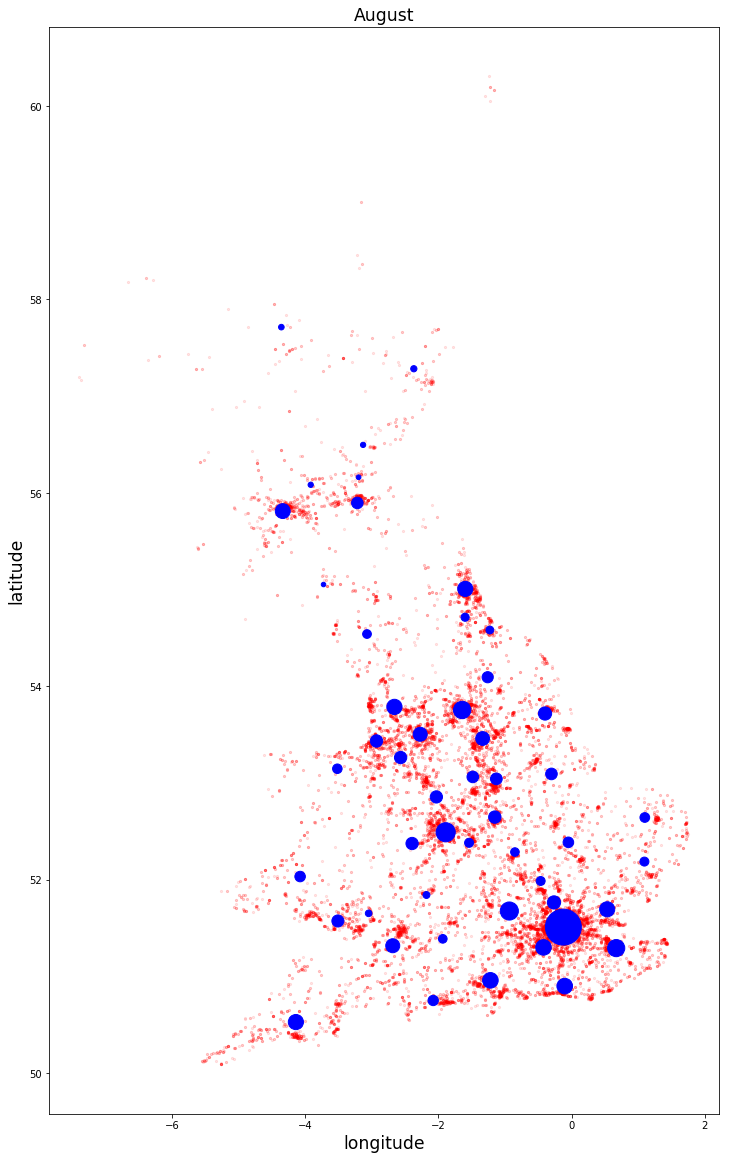

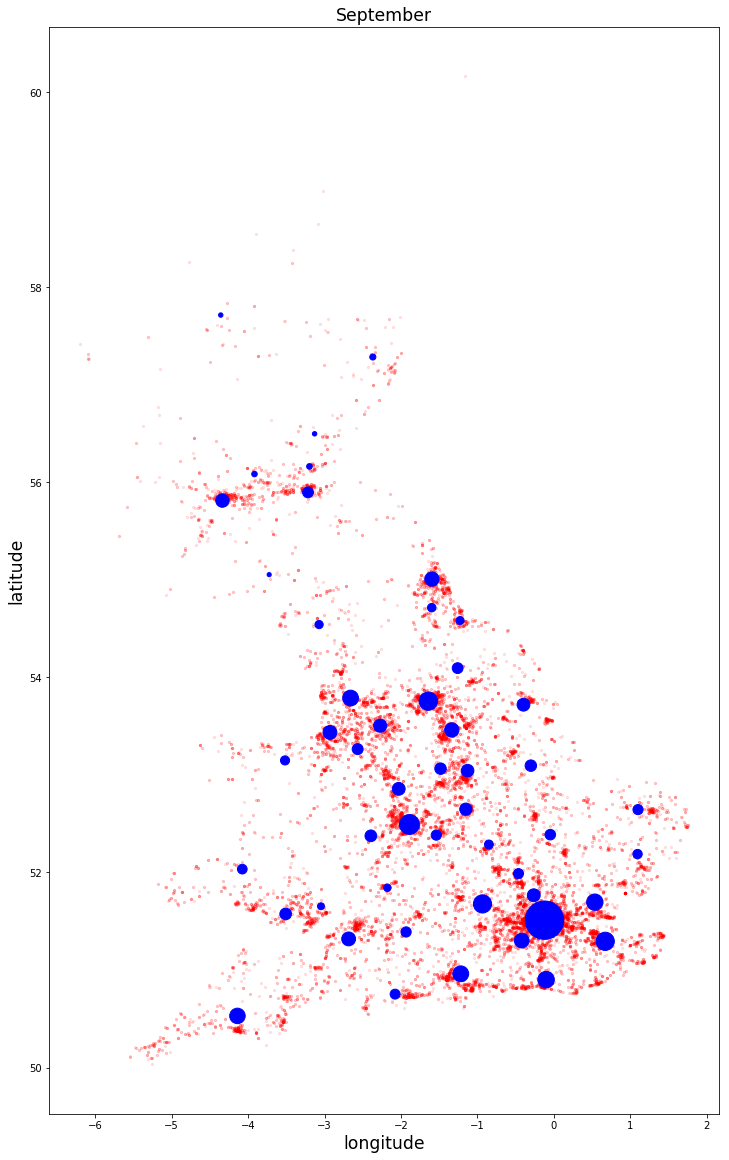

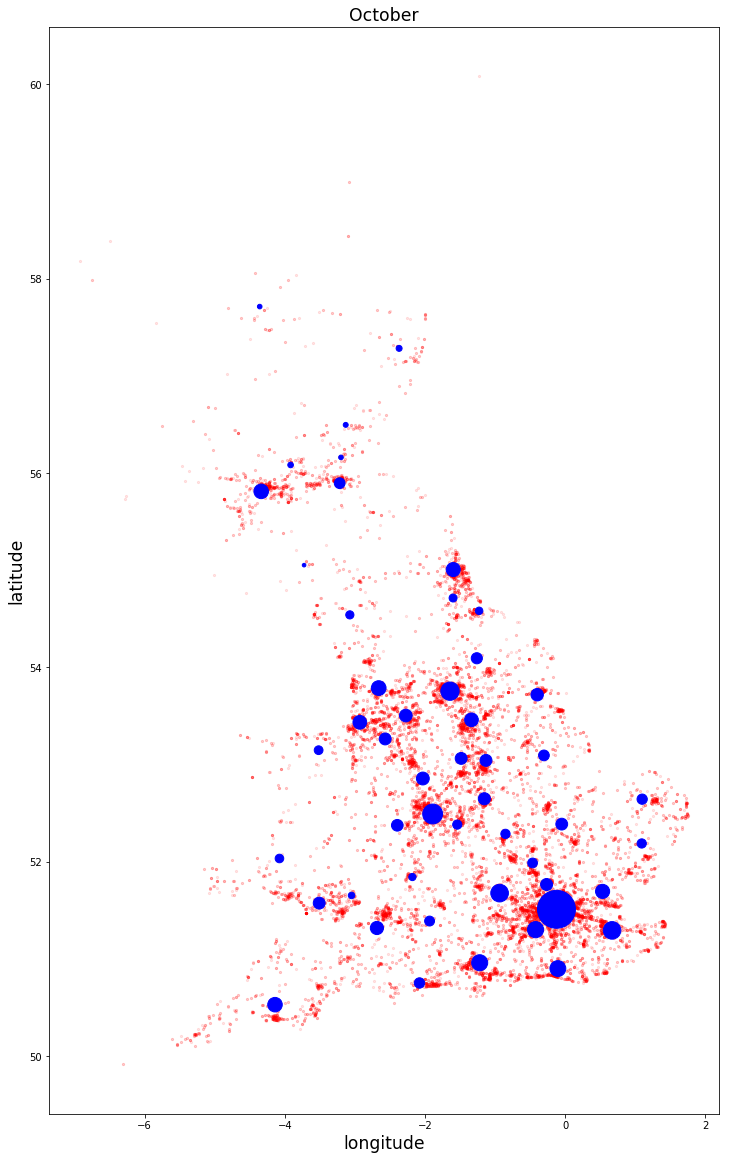

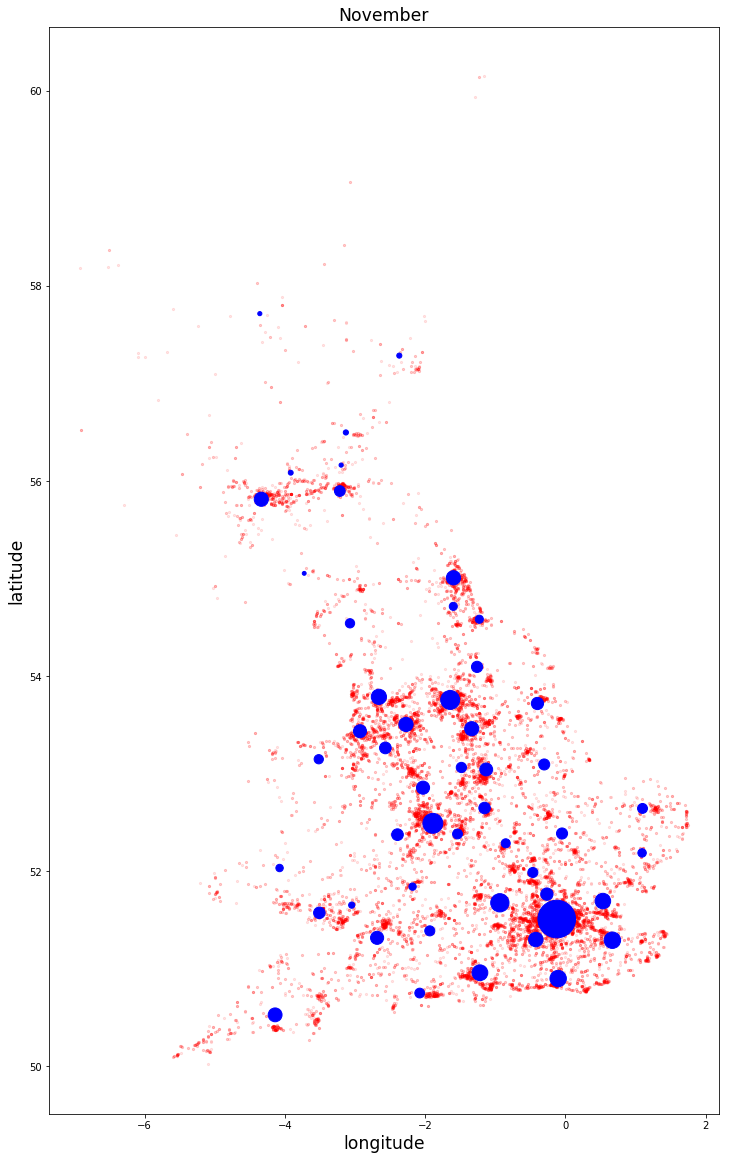

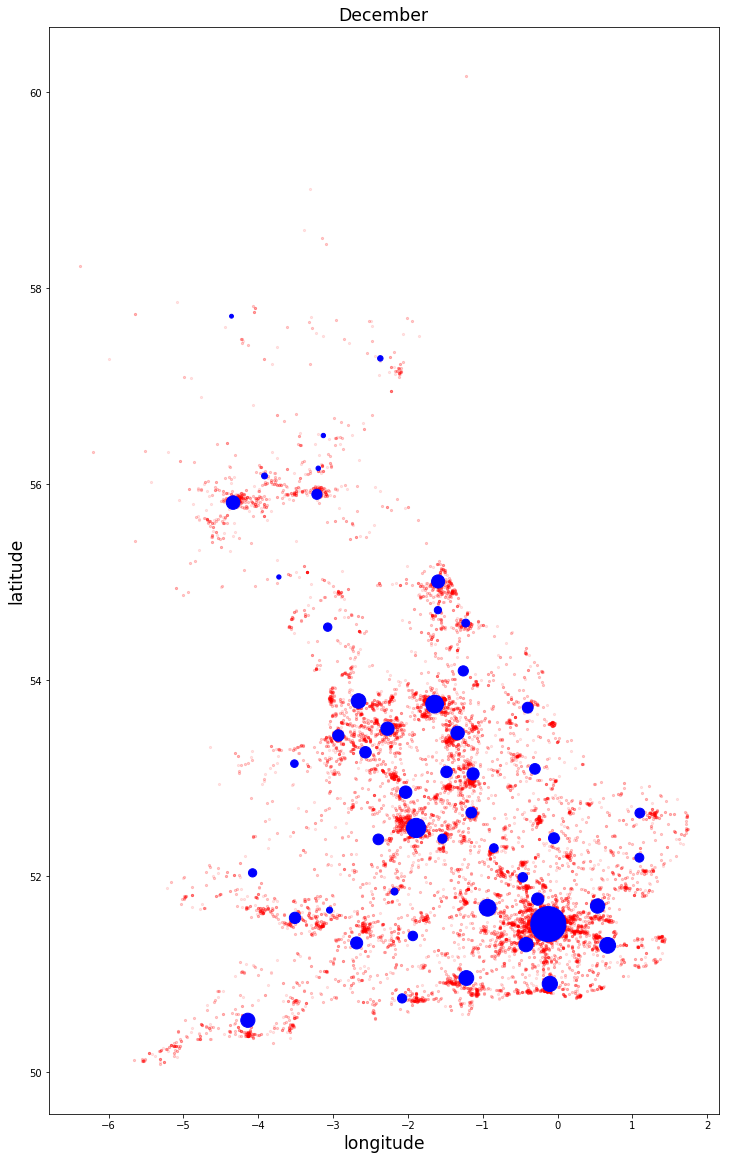

In [79]:
month = ['January','February','March','April','May','June','July','August','September','October','November','December']
for i in range(12):
    a = data1[data1['date'].between(m[i], m[i+1])]
    b = data[data['date'].between(m[i], m[i+1])]
    counts = a.groupby(["longitude", "latitude"]).size().reset_index(name='freq')
    plt.figure(figsize=(12.0, 20.0))
    plt.title(month[i],fontsize = 'xx-large')
    plt.scatter(b.longitude,b.latitude,s=5,c='r',marker='o',alpha=0.1)
    plt.scatter(counts['longitude'],counts['latitude'],s=counts['freq']/3,c='b',marker='o',alpha=1)
    plt.xlabel('longitude',fontsize = 'xx-large')
    plt.ylabel('latitude',fontsize = 'xx-large')
    plt.savefig('./uk_map_' + month[i] + '.png')
    plt.show()

In [ ]:
month = ['January','February','March','April','May','June','July','August','September','October','November','December']
for i in range(12):
    a = data1[data1['date'].between(m[i], m[i+1])]
    b = data[data['date'].between(m[i], m[i+1])]
    counts = a.groupby(["longitude", "latitude"]).size().reset_index(name='freq')
    plt.figure(figsize=(12.0, 20.0))
    plt.title(month[i],fontsize = 'xx-large')
    plt.scatter(b.longitude,b.latitude,s=5,c='r',marker='o',alpha=0.1)
    plt.scatter(counts['longitude'],counts['latitude'],s=counts['freq']/3,c='b',marker='o',alpha=1)
    plt.xlabel('longitude',fontsize = 'xx-large')
    plt.ylabel('latitude',fontsize = 'xx-large')
    plt.savefig('./uk_map_' + month[i] + '.png')
    plt.show()

In [33]:
a = data.select_dtypes(include='object').columns

data.drop(columns=a,inplace=True)

data.shape
print(a)

Index(['accident_index', 'local_authority_(highway)',
       'lsoa_of_accident_location'],
      dtype='object')
